# Problems 1 - Linear Regression

## 1.1 Warming up

Consider the training set of $m=4$ training examples of the table below.

| x   |  y  |
|:---:|:---:|
|  1  | 1.0 | 
|  2  | 1.5 | 
|  4  | 2.5 | 
|  0  | 0.5 | 

Consider the linear regression model $f_w(x) = w_0+w_1x$. 

<font color=blue>**Question:** Would a linear regression trained model be able to fit this data perfectly?</font>

<font color=blue>What are the values of $w_0$ and $w_1$ that you would expect to obtain upon running gradient descent on this model?</font>

---

*Answer*

Assuming that the gradient descent algorithm fits the line perfectly, the bias $w_0$ would be 0.5, and the slop $w_1$ would be 0.5 as well.

I would expect the GD to get this values with a very small margin of error, less than $\pm 0.01$ probabl. This is because of the learning rate is going to affect how close it can get to the perfect values.

---


## 1.2 Plotting data

You are given the following data on Cuba's PPP evolution. PPP is the Gross Domestic Product Purchasing Power Parity - an indication of a country's currency value compared to another country. Here it is compared to US dollars.

| Year | Cuba's PPP |
|------|-------|
| 1999 | 1,700 |
| 2000 | 1,700 |
| 2002 | 2,300 |
| 2003 | 2,900 |
| 2004 | 3,000 |
| 2005 | 3,500 |
| 2006 | 4,000 |
| 2007 | 11,000|
| 2008 | 9,500 |
| 2009 | 9,700 |
| 2010 | 9,900 |

Let's do a scatter plot of this data using `matplotlib`. You can have a look at the documentation of the `plot( )` function [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [1]:
import matplotlib.pyplot as plt

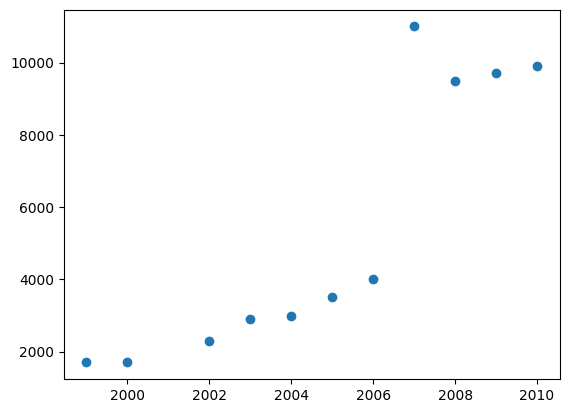

In [2]:
x = [1999, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
y = [1700, 1700, 2300, 2900, 3000, 3500, 4000, 11000, 9500, 9700, 9900]

plt.plot(x, y, 'o') # plot dots ('o') for each sample
plt.show()

<font color=blue>**Question:** What do you make of this data? How did the PPP of Cuba evolve over the years? Could we fit this with a linear model?</font>

---

*Answer*

There is an updwards trajectory that abruply jumps up in the years 2007 and 2008, likely due to the transfers of power that occured in those years, or a Hurricane that caused 500 million USD in damages over the island. [Source: Wikipedia](https://en.wikipedia.org/wiki/Category:2007_in_Cuba). I would bet on the former.

Fitting this data with a linear model is possible but no ideal, since the big jump would not correlate with a straight line taking into account the other parts of the data. In my opinion, a polynomial regression model would fit better the data supposedly.

---


Imagine that you try to fit a linear model to these data. This means a linear regression model of the form $f_w(x) = w_0+w_1x$ that is controlled by two parameters $w_0$ and $w_1$. Below is some code that first plots the data, and then plots a line given $w_0$ and $w_1$.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


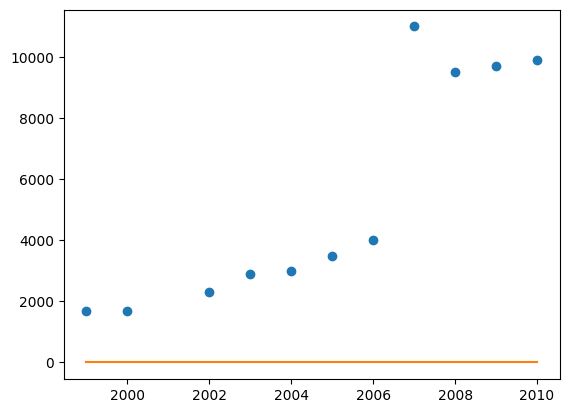

In [3]:
# Plot the data
plt.plot(x, y, 'o') # plot dots ('o') for each sample

# Define the parameters for a line y = w0 + w1 * x
w = [ 0, 0 ] # These are the parameters of the line [w0, w1]

# Calculate a series of points along the line
xx = range(1999, 2011) # This will create a list of integers from [1999 to 2010] which is the range of your x values
yy = [w[0] + w[1] * x for x in xx] # Use list comprehension to create a list of corresponding outputs for y

# Plot the line, connecting the points calculated
plt.plot(xx, yy)
print(yy)
plt.show()

<font color=blue>**Exercise:** Can you manually adjust the two parameters in the code to obtain a line that fits the data well in your opinion?</font>

[-900, 0, 900, 1800, 2700, 3600, 4500, 5400, 6300, 7200, 8100, 9000]


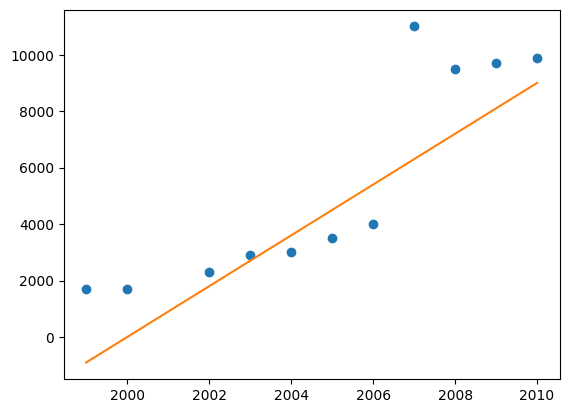

In [4]:
# YOUR CODE HERE

plt.plot(x, y, 'o') # plot dots ('o') for each sample

# Define the parameters for a line y = w0 + w1 * x
w = [-1800000, 900 ] # These are the parameters of the line [w0, w1]

# Calculate a series of points along the line
xx = range(1999, 2011) # This will create a list of integers from [1999 to 2010] which is the range of your x values
yy = [w[0] + w[1] * x for x in xx] # Use list comprehension to create a list of corresponding outputs for y

# Plot the line, connecting the points calculated
plt.plot(xx, yy)
print(yy)
plt.show()

<font color=blue>**Question:** What do you observe about the values of the parameters you have found?</font>

---

*Answer*

The first parameter specially has not an intuitive value, I had to contruct the line using some calculation between to points. They are not straightforward to get completely manually.

---


## 1.3 House Prices

During the previous lecture, we used a running example of house prices. The task to be done is to predict the price of a house given some 'features' of the house. Our input data comprises two features per sample (size of the house, and number of rooms), while the output data is the price each house was sold at.

Here is the data:

| Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |
|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|
| 2104.0 | 3.0 |  **399900.0** | 1890.0 | 3.0 |  **329999.0** | 3890.0 | 3.0 |  **573900.0** | 1239.0 | 3.0 |  **229900.0** |
| 1600.0 | 3.0 |  **329900.0** | 4478.0 | 5.0 |  **699900.0** | 1100.0 | 3.0 |  **249900.0** | 2132.0 | 4.0 |  **345000.0** |
| 2400.0 | 3.0 |  **369000.0** | 1268.0 | 3.0 |  **259900.0** | 1458.0 | 3.0 |  **464500.0** | 4215.0 | 4.0 |  **549000.0** | 
| 1416.0 | 2.0 |  **232000.0** | 2300.0 | 4.0 |  **449900.0** | 2526.0 | 3.0 |  **469000.0** | 2162.0 | 4.0 |  **287000.0** |
| 3000.0 | 4.0 |  **539900.0** | 1320.0 | 2.0 |  **299900.0** | 2200.0 | 3.0 |  **475000.0** | 1664.0 | 2.0 |  **368500.0** | 
| 1985.0 | 4.0 |  **299900.0** | 1236.0 | 3.0 |  **199900.0** | 2637.0 | 3.0 |  **299900.0** | 2238.0 | 3.0 |  **329900.0** | 
| 1534.0 | 3.0 |  **314900.0** | 2609.0 | 4.0 |  **499998.0** | 1839.0 | 2.0 |  **349900.0** | 2567.0 | 4.0 |  **314000.0** | 
| 1427.0 | 3.0 |  **198999.0** | 3031.0 | 4.0 |  **599000.0** | 1000.0 | 1.0 |  **169900.0** | 1200.0 | 3.0 |  **299000.0** | 
| 1380.0 | 3.0 |  **212000.0** | 1767.0 | 3.0 |  **252900.0** | 2040.0 | 4.0 |  **314900.0** | 852.0  | 2.0 |  **179900.0** | 
| 1494.0 | 3.0 |  **242500.0** | 1888.0 | 2.0 |  **255000.0** | 3137.0 | 3.0 |  **579900.0** | 1852.0 | 4.0 |  **299900.0** | 
| 1940.0 | 4.0 |  **239999.0** | 1604.0 | 3.0 |  **242900.0** | 1811.0 | 4.0 |  **285900.0** | 1203.0 | 3.0 |  **239500.0** | 
| 2000.0 | 3.0 |  **347000.0** | 1962.0 | 4.0 |  **259900.0** | 1437.0 | 3.0 |  **249900.0** | 

Let's first get them into Python. For simplification we are going to use only one feature for the time being - the size of the house.

In [5]:
import numpy as np

In [6]:
size = np.array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380., 
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

rooms = np.array([3., 3., 3., 2., 4., 4., 3., 3., 3., 3., 4., 3., 3., 5., 3., 4., 2.,
       3., 4., 4., 3., 2., 3., 4., 3., 3., 3., 3., 3., 3., 2., 1., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 3., 4., 3., 2., 4., 3.])

price = np.array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

<br>

<font color=blue>**Exercise:** How many samples do we have in our dataset?</font>

In [7]:
# YOUR CODE HERE

price.size

47

<br>

<font color=blue>**Exercise:** Do a scatter plot of size versus price (you can ignore the number of rooms for now)</font>

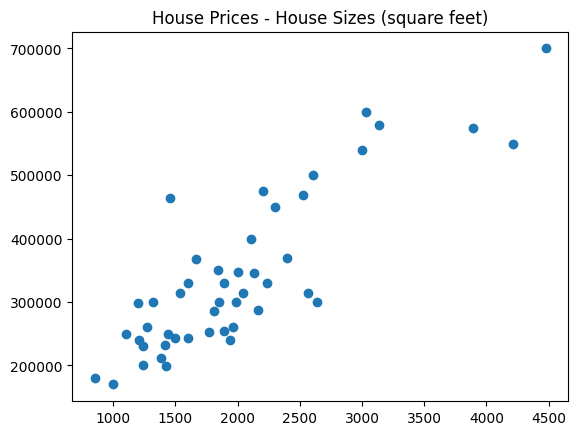

In [8]:
# YOUR CODE HERE

plt.title('House Prices - House Sizes (square feet)')
plt.scatter(size, price)

We want to automatically find a model to predict prices $y$ for houses that are not in our dataset. In linear regression, the model $f$ is a linear function of the input data ($x$, in our case the house size):

> $f_w(x) = w_0 + w_1 x$

For this we need to choose the parameters $w_i$ minimizing a cost function $J$ e.g. the average squared difference between the predictions ($f_w$) and the real prices ($y$) in our training data:

> $\hat{w} = \underset{w}{\text{minimize}} {1 \over 2m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)})^2}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in our training set. 

Notice that on derivation the $2$ would get cancelled out. The reason for it its exactly this, as because of the square in the derivation process, the $2$ passes as a scalar multiplying. Having it in the cost function just simplifies the resulting derivatives.

This optimization problem can be solved in different ways, in this example we are going to implement the Gradient Descent algorithm. In pseudo-code the Gradient Descent algorithm is formalized as follows:

repeat until convergence:

> {
> 
> $w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)
>
> }

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by (generic expression):

> $\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

In our case, the partial derivatives for $w_0$ and $w_1$ are:

> $\frac{\partial}{\partial w_0} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)})}$

> $\frac{\partial}{\partial w_1} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x^{(i)}}$

Let's see a first (quite inefficient) version of the Gradient Descent algorithm in Python:

In [9]:
def GradientDescent(x, y, max_iterations=100, alpha=0.00000001):
    m = len(x) # number of samples
   
    #initialize the parameters to zero (or any other random value)
    w0 = 0
    w1 = 0
    
    for it in range(max_iterations): #lets take a max of max_iteration steps updating the parameters
        s0 = 0 # We will use this to calculate the sum inside the cost function
        s1 = 0
        for i in range(m): #Go over the points and calculate the sum
            h = w0 + w1 * x[i]
            s0 = s0 + (h - y[i])
            s1 = s1 + (h - y[i])* x[i]
        Grad0 = s0 / m 
        Grad1 = s1 / m 
        
        w0 = w0 - alpha * Grad0
        w1 = w1 - alpha * Grad1
        
    return [w0, w1]
    
w = GradientDescent(size, price)
w

[np.float64(0.08050805332714407), np.float64(163.9249033496211)]

<br>

<font color=blue>**Exercise:** Plot the points of our dataset and a line using the parameter values `w` that you just calculated</font>

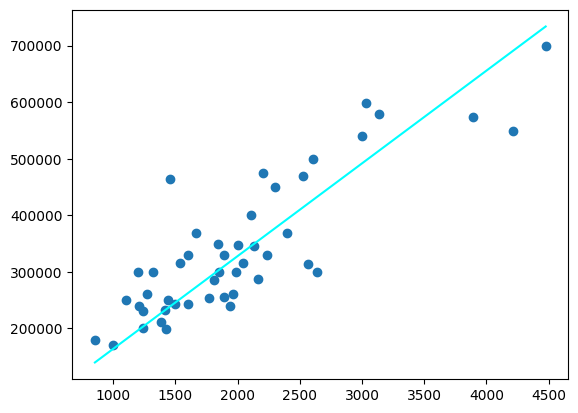

In [10]:
# YOUR CODE HERE
xx = np.arange(min(size), max(size)) # create a range to get the horizontal values
yy = [w[0] + w[1] * x for x in xx] # list comprehension like the previous cells

plt.scatter(size, price)
plt.plot(xx,yy, color='cyan')
plt.show()

<br>

<font color=blue>**Exercise:** Use the model you have calculated to predict the price of a house with `size = 3200` square feet.</font>

In [11]:
# YOUR CODE HERE
x_value = 3200 # our size value
result = w[0] + w[1]*x_value

print(f'{result:.2f}') # f-strings are cool

524559.77


<font color=blue>**Exercise:** Modify the gradient descent function to store and return the cost in every iteration, so that we can then plot the evolution of the cost during the optimisation (training) process. Then use it to plot the cost evolution.</font>

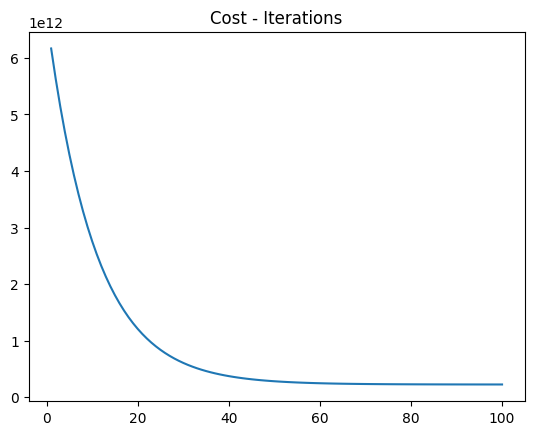

In [12]:
# YOUR CODE HERE

def cost(y_hat, y):
    return np.sum((y_hat - y)**2)

def GradientDescent(x, y, max_iterations=100, alpha=0.00000001):
    m = len(x) # number of samples
   
    # initialize the parameters to zero (or any other random value)
    w0 = 0
    w1 = 0

    cost_list = []
    
    for it in range(max_iterations): # lets take a max of max_iteration steps updating the parameters
        s0 = 0 # We will use this to calculate the sum inside the cost function
        s1 = 0
        y_hat_list = []
        for i in range(m): # Go over the points and calculate the sum
            h = w0 + w1 * x[i] # y_hat
            y_hat_list.append(h) # STORE the y_hat values for each iteration

            s0 = s0 + (h - y[i])
            s1 = s1 + (h - y[i])* x[i]

        cost_list.append(cost(y_hat_list, y))

        Grad0 = s0 / m 
        Grad1 = s1 / m

        
        w0 = w0 - alpha * Grad0
        w1 = w1 - alpha * Grad1
        
    return [w0, w1], cost_list # the cost list is returned

w, cost_list = GradientDescent(size, price)
xx = np.arange(1, 101)
plt.title('Cost - Iterations')
plt.plot(xx, cost_list)

<font color=blue>**Exercise:** Play around with different values of the `max_iterations` and `alpha` (learning rate) parameters and plot the evolution of the cost function. For what values of the learning rate does the process converge, and when does it diverge?</font>

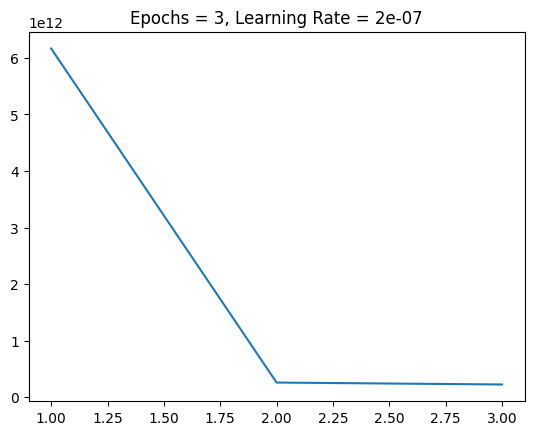

In [13]:
# YOUR CODE HERE
epochs = 3
learning_rate = 2*10**-7

w, cost_list = GradientDescent(size, price, max_iterations=epochs, alpha=learning_rate)
xx = np.arange(1, epochs+1)

plt.title(f'Epochs = {epochs}, Learning Rate = {learning_rate}')
plt.plot(xx, cost_list)

I have found out that the limit to the learning rate (to be high as possible) is 2e-07. With it the model converges in 2-3 iterations of the algorithm.

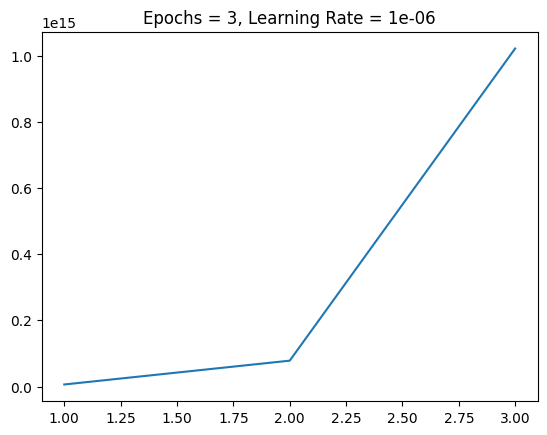

In [19]:
epochs = 3
learning_rate = 10**-6

w, cost_list = GradientDescent(size, price, max_iterations=epochs, alpha=learning_rate)
xx = np.arange(1, epochs+1)

plt.title(f'Epochs = {epochs}, Learning Rate = {learning_rate}')
plt.plot(xx, cost_list)

Using a learning rate with a magnitude superior to $10^{-7}$ yields divergence in the model. Above is displayed one run with $10^{-6}$. Notes that the scale of the cost is different in both graphs.

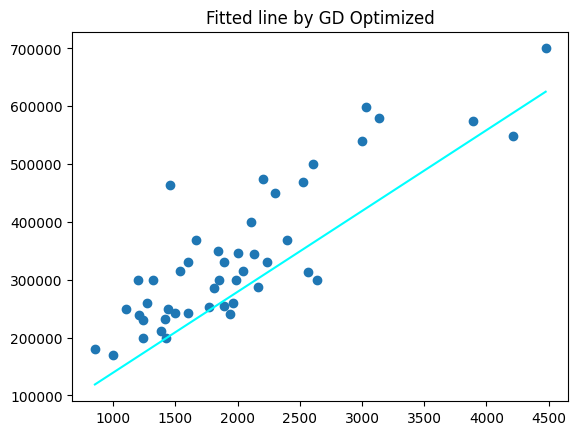

In [15]:
xx = np.arange(min(size), max(size)) # create a range to get the horizontal values
yy = [w[0] + w[1] * x for x in xx] # list comprehension like the previous cells

plt.title('Fitted line by GD Optimized')
plt.scatter(size, price)
plt.plot(xx,yy, color='cyan')
plt.show()

<br>

*Info*: There are existing implementations for linear regression available for Python. For example, using the sklearn module's implementation, it would be:

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(size).reshape(-1, 1) # make this a 1 column vector
y = np.array(price)

reg = LinearRegression().fit(x, y)

print('The estimated value of w0 (the intercept of the line) is: {0}'.format(reg.intercept_))
print('The estimated value of w1 (the slope) is: {0}'.format(reg.coef_[0]))

print('The estimated price for a house with size = 3200 using the model would be: {0}'.format(reg.predict([[3200]])))

The estimated value of w0 (the intercept of the line) is: 71270.49244872917
The estimated value of w1 (the slope) is: 134.5252877202413
The estimated price for a house with size = 3200 using the model would be: [501751.4131535]


<br>

<font color=blue>**Home Study:** Have a look at the help pages for the `LinearRegression()` function of `sklearn`, as well as a read of the help page of the function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) </font>

---
Observations:
The function that is being fitted seems to be the residual squared sum, which is like MSE but subtracting the ground truth from our model's prediction:
> "minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation."
---

<br>

<font color=blue>**Food for thought:** The parameters that the sklearn model obtains seem to be quite different from what our model does... you could try a few more values in or outside the range of house sizes we have. Which model is better in your opinion? Why? Where does this difference come from?</font>

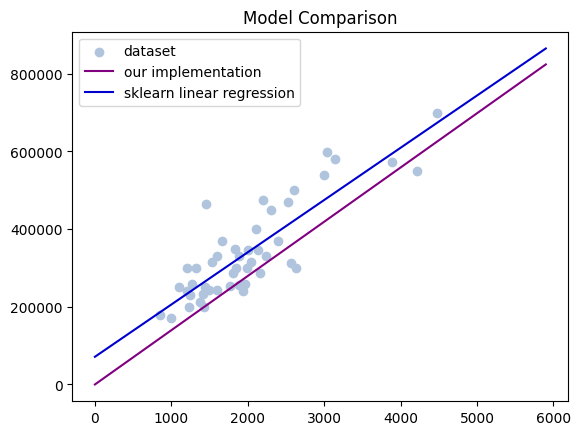

In [17]:
# YOUR CODE HERE

w0, w1 = w
w0_gd, w1_gd = reg.intercept_, reg.coef_

xx = np.arange(0, 6000, 100) # x axis

yy = w0 + w1*xx
yy_gd = w0_gd + w1_gd*xx

plt.title('Model Comparison')
plt.scatter(size, price, color='lightsteelblue', label="dataset")
plt.plot(xx, yy, color='purple', label='our implementation')
plt.plot(xx, yy_gd, color='mediumblue', label='sklearn linear regression')
plt.legend()
plt.show()

In [18]:
min(size)

np.float64(852.0)

---

*Answer*

To evaluate a model we can think of the real dataset behaviour and what its limits are. The smaller house that we have has 852 square feet (~79 square metres); houses smaller than that exist. Since the sklearn model is less stepper, I consider that it has more realistic predictions in the smaller houses, since a house price would not start at zero.

---
